# MILESTONE PROJECT 1: FOOD VISION BIG

## Check GPU
* Google colab offers free GPU's. To use mixed precision we need score of 7+.
Google Colab offers:
* K80 (not compatible)
* P100 (not compatible)
* Tesla T4 (compatible)
We need Tesla T4

In [35]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-2d687a2a-d1ee-0b7a-56e5-46bb4d2ae4e8)


## Get helper functions
In the past I have created certain functions which were used regularly to save time.
Location:https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

In [36]:
# Download helper function
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-07-24 06:59:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-07-24 06:59:44 (101 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [37]:
# Import functions from the file
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys,walk_through_dir,load_and_prep_image

# Use TensorFlow Datasets to download data

In [38]:
# Get tensorflow datasets
import tensorflow_datasets as tfds

In [39]:
# List all available datasets
datasets_list = tfds.list_builders() # Get all available datasrts in TFDS
print("food101" in datasets_list) # Check for food101
print(datasets_list)


True
['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'ai2dcaption', 'aloha_mobile', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asimov_dilemmas_auto_val', 'asimov_dilemmas_scifi_train', 'asimov_dilemmas_scifi_val', 'asimov_injury_val', 'asimov_multimodal_auto_val', 'asimov_multimodal_manual_val', 'asqa', 'asset', 'assin2', 'asu_table_top_converted_externally_to_rlds', 'austin_buds_dataset_converted_externally_to_rlds', 'austin_sailor_dataset_converted_externally_to_rlds', 'austin_sirius_dataset_converted_externally_to_rlds', 'bair_robot_pushing_small', 'bc_z', 'bccd', 'beans', 'bee_dataset', 'beir', 'berkeley_autolab_ur5', 'berkeley_cable_routing', 'berkeley_fanuc_manipulation', 'berkeley_gnm_cory_hall', 'berkeley_gnm_recon', 'berkeley_gnm_sac_son', 'berkeley_mvp_converted_externally_to_rlds', 'berkeley_rpt_converted_externally_to_rlds', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits

In [40]:
# Load in the data (takes 5-6 minutes in Google Colab)
(train_data, test_data), ds_info  = tfds.load(name = "food101",
                                              split = ["train","validation"],
                                              shuffle_files= True,
                                              as_supervised= True,# Data returned in tuple format (data,label)
                                              with_info = True)

## Exploring the Food101 data from TensorFlow Datasets
To become one with the data, we need to find:
* Class names
* The shape of our input data (image tensors)
* The datatype of our input data
* What our labels look like (e.g are they one-hot encoded or are they label encoded)
* Do the label match up with the class names ?

In [41]:
# Features of Food101 dataset from TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [42]:
# Get the class names
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [43]:
# Take one sample of train data
train_data
train_one_sample = train_data.take(1) # Sample are in format (inmage_tensore,label)

In [44]:
# What does one sample of our training data look like
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [45]:
# Output info about our training sample
for image,label in train_one_sample:
  print(f"""
  Image shape : {image.shape}
  Image datatype : {image.dtype}
  Target class from Food101 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
  """)


  Image shape : (384, 512, 3)
  Image datatype : <dtype: 'uint8'>
  Target class from Food101 (tensor form): 56
  Class name (str form): huevos_rancheros
  


In [46]:
# What does our image tensor from TFDS's look like ?
image

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [144,  81, 102],
        [142,  78, 102],
        [139,  75,  99]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [159,  96, 115],
        [154,  89, 111],
        [146,  83, 104]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [162,  98, 114],
        [162,  95, 113],
        [157,  93, 110]],

       ...,

       [[ 75,  32,  16],
        [ 77,  34,  17],
        [ 78,  35,  19],
        ...,
        [ 99,  31,  20],
        [104,  32,  20],
        [106,  34,  20]],

       [[ 81,  34,  18],
        [ 81,  34,  16],
        [ 82,  35,  19],
        ...,
        [102,  33,  26],
        [104,  36,  27],
        [109,  39,  31]],

       [[ 79,  30,  13],
        [ 80,  31,  14],
        [ 81,  32,  15],
        ...,
        [113,  46,  4

In [47]:
# Min and max values of our image tensors
import tensorflow as tf
tf.reduce_min(image),tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

## Plot the image

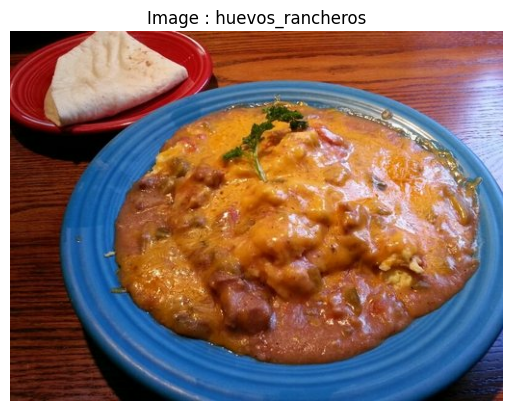

In [48]:
# Plot an image tensor
import matplotlib.pyplot as plt
plt.imshow(image)
plt.axis(False)
plt.title(f"Image : {class_names[label.numpy()]}");

## Prepare the dataset for our use
Neural networks perform best when data is in a certain way (e.g. batched, normalized, etc).
However, not all data (including data from from TensorFlow Datasets) comes like this.
So in order to get it ready for a neural network, you'll often have to write preprocessing functions and map it to your data.

 What we know about our data:
 *  In `uint8` datatype
 * Comprised of all different size tensors (different sized images)
 * Not scaled (the pixel values are between 0 & 255)

What we know models like:
*  Data in `float32` dtype (or for mixed precision `float16` and `float32`)
*  For batches, TensorFlow likes all of the tensors within a batch to be of the same size
*  Scaled (values between 0 & 1) also called normalized tensors generally perform better.

With these points in mind, we've got a few things we can tackle with a preprocessing function.

Since we are using EfficientNetBX pretrained model from tf.keras.applications we don't need to rescale our data (these architectures have rescaling built-in).

This means we need a function for :
1. Reshape our images to the same size.
2. Convert the dtype of our image tensors from `unit8` to `float 32`


In [49]:
def preprocess_img(image,label,img_shape = 224):
  """
  Converts image data type from 'uint8' -> 'float32'
  Reshapes image to (img_shape,img_shape,color_channels)
  """
  image = tf.image.resize(image,[img_shape,img_shape]) # Reshape target image
  # image = image/255. Not required for EfficientNet
  return tf.cast(image,tf.float32),label # return a float32 image and label tuple.

In [50]:
#Preprocess a single sample image and check the outputs
preprocessed_img = preprocess_img(image,label)[0]
print(f"Image before preprocessing:\n:{image[:2]}...,\n Shape:{image.shape},\nDatatype:{image.dtype}")
print(f"Image after preprocessing:\n:{preprocessed_img[:2]}...,\n Shape:{preprocessed_img.shape},\nDatatype:{preprocessed_img.dtype}")

Image before preprocessing:
:[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  81 102]
  [142  78 102]
  [139  75  99]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [159  96 115]
  [154  89 111]
  [146  83 104]]]...,
 Shape:(384, 512, 3),
Datatype:<dtype: 'uint8'>
Image after preprocessing:
:[[[  0.         0.         0.      ]
  [  0.         0.         0.      ]
  [  0.         0.         0.      ]
  ...
  [157.23973   91.24997  110.18368 ]
  [150.2857    86.622444 107.239784]
  [144.57637   80.47435  103.6325  ]]

 [[  0.         0.         0.      ]
  [  0.         0.         0.      ]
  [  0.         0.         0.      ]
  ...
  [157.85226   91.70941  105.097206]
  [164.45404   97.72448  114.3112  ]
  [159.09677   93.16319  110.545815]]]...,
 Shape:(224, 224, 3),
Datatype:<dtype: 'float32'>


## Batch and prepare data
We're now going to make our data input pipeline run really fast.


In [51]:
# Define the output signature for the dataset
img_shape = 224
data_signature = (
    tf.TensorSpec(shape=(img_shape, img_shape, 3), dtype=tf.float32),
    tf.TensorSpec(shape=(), dtype=tf.int64)
)

# Map preprocessing function to training (and parallelize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map preprocessing function to test data
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE) # .cache() - stores tensors in RAM but we are using colab so cant do here.

In [52]:
train_data,test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

##
"Hey, TensorFlow, map this preprocessing function `(preprocess_img)` across our training dataset, then shuffle a number of elements and then batch them together and finally make sure you prepare new batches `(prefetch)` whilst the model is looking through `(finding patterns) `the current batch."

## Creating modelling callbacks

We're going to create a couple of callbacks to help us while our model trains:

* TensorBoard callback to log training results (so we can visualize them later if need be)
* ModelCheckpoint callback to save the our model's progress after the feature extraction.

In [53]:
from helper_functions import create_tensorboard_callback

# Create a model checkpoint callback to save a model's progress during training
checkpoint_path = "model_checkpoints.weights.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         monitor = "val_accuracy",
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         verbose = 0) # dont print whether or not model is being saved

## Set up mixed precision
Mixed precision utilizes a combination of float32 and float16 data types to speed up model performance

In [54]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')
print(mixed_precision.global_policy())


<DTypePolicy "mixed_float16">


## Build feature extraction model

In [55]:
from tensorflow.keras import layers
# from tensorflow.keras.layers import preprocessing

# Create a Base Model
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Create functional model
inputs = layers.Input(shape = input_shape,name = "Input_layer")
# Preprocessing (Not for Eff.. models)
# x = preprocessing.Rescaling(1./255)(inputs) # Apply rescaling if needed
x = base_model(inputs, training = False) # makes sure the layers which should be in not training stay like that.
x = layers.GlobalAveragePooling2D(name = "pooling_layer")(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax",dtype = tf.float32, name = "softmax_float32")(x)
model = tf.keras.Model(inputs,outputs)

In [56]:
# Compile the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])


In [57]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_layer                   │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 101)            │       129,381 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_3 (Cast)                   │ (None, 101)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_float32 (Activation)    │ (None, 101)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [58]:
for layer in model.layers:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

Input_layer True float32 <DTypePolicy "mixed_float16">
efficientnetb0 False float32 <DTypePolicy "mixed_float16">
pooling_layer True float32 <DTypePolicy "mixed_float16">
dense_1 True float32 <DTypePolicy "mixed_float16">
softmax_float32 True float32 <DTypePolicy "float32">


Going through the above we see:
* `layer.name`: the human readable name of a particular layer
* `layer.trainable`: is the layer trainable or not? (if `False`, the weights are frozen)
* `layer.dtype`: the data type a layer stores its variables in
* `layer.dtype_policy`: the data type policy a layer computes on its variables with


In [59]:
for layer in model.layers[1].layers:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

input_layer_1 False float32 <DTypePolicy "mixed_float16">
rescaling_2 False float32 <DTypePolicy "mixed_float16">
normalization_1 False float32 <DTypePolicy "mixed_float16">
rescaling_3 False float32 <DTypePolicy "mixed_float16">
stem_conv_pad False float32 <DTypePolicy "mixed_float16">
stem_conv False float32 <DTypePolicy "mixed_float16">
stem_bn False float32 <DTypePolicy "mixed_float16">
stem_activation False float32 <DTypePolicy "mixed_float16">
block1a_dwconv False float32 <DTypePolicy "mixed_float16">
block1a_bn False float32 <DTypePolicy "mixed_float16">
block1a_activation False float32 <DTypePolicy "mixed_float16">
block1a_se_squeeze False float32 <DTypePolicy "mixed_float16">
block1a_se_reshape False float32 <DTypePolicy "mixed_float16">
block1a_se_reduce False float32 <DTypePolicy "mixed_float16">
block1a_se_expand False float32 <DTypePolicy "mixed_float16">
block1a_se_excite False float32 <DTypePolicy "mixed_float16">
block1a_project_conv False float32 <DTypePolicy "mixed_fl

##  Fit the feature extraction model
If our goal is to fine-tune a pre-trained model, the general order of doing things is:
1. Build a feature extraction model (train a couple output layers with base model layers frozen)
2. Fine-tune some of the frozen layers

In [60]:
# Train the model
history = model.fit(train_data,
                    epochs = 3,
                    steps_per_epoch = len(train_data),
                    validation_data = test_data,
                    validation_steps = int(0.15 * len(test_data)),
                    callbacks = [create_tensorboard_callback("training_logs","efficientb0_101_classes_all_data_F.E"),
                                 checkpoint_callback])

Saving TensorBoard log files to: training_logs/efficientb0_101_classes_all_data_F.E/20250724-065950
Epoch 1/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 214s 76ms/step - accuracy: 0.4754 - loss: 2.2912 - val_accuracy: 0.6949 - val_loss: 1.1390
Epoch 2/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 163s 68ms/step - accuracy: 0.6655 - loss: 1.2905 - val_accuracy: 0.7164 - val_loss: 1.0318
Epoch 3/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 203s 69ms/step - accuracy: 0.7042 - loss: 1.1316 - val_accuracy: 0.7254 - val_loss: 0.9998


In [61]:
model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - accuracy: 0.7236 - loss: 1.0062


[1.002197504043579, 0.7260593771934509]

In [62]:
model.save("model.keras")

## Fine-tuning the model to improve accuracy

In [63]:
#Unfreeze all the layers in base model
base_model.trainable = True

#Refreeze every layer expect 10 last layers -
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [64]:
# Recompile the model after unfreezing layers
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

In [65]:
# fine_tune it for another 3 epochs (total 6 epochs)
fine_tune_epochs = 6 # total epochs after fine-tuning
# fine_tune it now
history_2 = model.fit(train_data,
                      epochs = fine_tune_epochs,
                      validation_data = test_data,
                      validation_steps = int(0.15 * len(test_data)),
                      initial_epoch = history.epoch[-1],
                      callbacks = [create_tensorboard_callback("training_logs","efficientb0_101_classes_all_data_F.E"),
                                 checkpoint_callback])

Saving TensorBoard log files to: training_logs/efficientb0_101_classes_all_data_F.E/20250724-071025
Epoch 3/6
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 214s 77ms/step - accuracy: 0.6664 - loss: 1.2580 - val_accuracy: 0.7428 - val_loss: 0.9244
Epoch 4/6
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 198s 81ms/step - accuracy: 0.7498 - loss: 0.9160 - val_accuracy: 0.7529 - val_loss: 0.9033
Epoch 5/6
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 165s 69ms/step - accuracy: 0.7926 - loss: 0.7489 - val_accuracy: 0.7601 - val_loss: 0.8925
Epoch 6/6
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 166s 69ms/step - accuracy: 0.8280 - loss: 0.6095 - val_accuracy: 0.7587 - val_loss: 0.8907


In [76]:
y_pred_probs = model.predict(test_data)
y_pred = tf.argmax(y_pred_probs,axis = 1).numpy()
y_true = [label.numpy() for _,label in test_data]
class_names = ds_info.features['label'].names

790/790 ━━━━━━━━━━━━━━━━━━━━ 51s 64ms/step


In [71]:
model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 54s 68ms/step - accuracy: 0.7607 - loss: 0.8853


[0.8811253905296326, 0.7608712911605835]

In [77]:
# We need to make sum changes to our make_confusion_matrix to ensure the x-labels print vertically.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np
# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Changed (plot x-labels vertically)
  plt.xticks(rotation = 70, fontsize = text_size)
  plt.yticks(fontsize = text_size)
  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

In [78]:
# We need to make sum changes to our make_confusion_matrix to ensure the x-labels print vertically.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np
# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Changed (plot x-labels vertically)
  plt.xticks(rotation = 70, fontsize = text_size)
  plt.yticks(fontsize = text_size)
  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

# Get the true labels from the test dataset by unbatching
y_true = [label.numpy() for images, label in test_data.unbatch()]

# Get the predicted labels
y_pred_probs = model.predict(test_data)
y_pred = tf.argmax(y_pred_probs, axis=1).numpy()

# Get the class names
class_names = ds_info.features['label'].names

# Make and plot the confusion matrix
make_confusion_matrix(y_true,y_pred,classes=class_names,figsize=(101,101),text_size = 20)

ValueError: Found input variables with inconsistent numbers of samples: [790, 25250]

In [ ]:
loaded_model = tf.keras.models.load_model("model.keras")

In [ ]:
for layers in model.layers:
  layers.trainable = False
for layers in model.layers[-5:]:
  layers.trainable = True

In [ ]:
loaded_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

In [ ]:
loaded_model.fit(train_data,
                 epochs = fine_tune_epochs,
                 intial_epoch = history.epoch[-1],
                 validation_data = test_data,
                 validation_steps = int(0.15 * len(test_data)),
                 callbacks = [create_tensorboard_callback("training_logs","efficientb0_101_classes_all_data_F.E"),
                                 checkpoint_callback])


In [ ]:
# Get a dictionary of classification report
classification_report_dict = classification_report(y_labels,pred_classes,output_dict = True)
classification_report_dict
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report dictionary items
for key,value in classification_report_dict.items():
  if key == 'accuracy' :
    break
  else:
    class_f1_scores[class_names[int(key)]] = value['f1-score']
class_f1_scores

# Turn f1-scores into dataframes for visualisations
import pandas as pd
f1_scores = pd.DataFrame({'class_names':list(class_f1_scores.keys()),
                         'f1-scores':list(class_f1_scores.values())}).sort_values("f1-scores",ascending = False)
f1_scores

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,25))
scores = ax.barh( range(len(f1_scores)),
                  f1_scores['f1-scores'].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores['class_names'])
ax.set_xlabel("F1-scores")
ax.set_title("F1-scores per class predicted by food vision")
ax.invert_yaxis() # Reverse order of plot
ax.bar_label(scores, fmt='%.2f'); # Writes its value in horizontal bars